### Name : Zahra Soukhtedel
### StudentID : 98105138

# 2. winner takes all network

### Consider a simple neural network consisting of two neurons that follow the winner takes all process. ODEs are as follows:
### $$\tau \frac{dE_1}{dt} = -E_1 + S{(k_1 - 3E_2)}\\
\tau \frac{dE_2}{dt} = -E_2 + S{(k_2 - 3E_1)}$$
###It is 𝐸1 the spiking rate of the number one neuron when receiving the input 𝑘1, and the second neuron has an inhibitory function. The function S is defined as follows:
### $$S(x) = \frac{Mx^N}{\sigma^N + x^N} \text{ if } x \geq 0\\ S(x) = 0 \text{ if } x < 0$$




### 2.1 Consider the following numerical value and by simulating the phase plane 𝐸1 and 𝐸2 along with the nullcline and the limit cycle for 3 different initial points.
### $$\tau = 20, N = 2, M = 100, \sigma = 120, k_1=k_2= 120$$

first we implement ODEs as follows using BrainPy:


In [91]:
!pip install brainpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt
from functools import partial
import numpy as np
import scipy.integrate
import scipy
import matplotlib.patches as mpatches #used to write custom legends
%matplotlib inline
bm.set_platform('cpu')


In [93]:
def matrixS(a, M, N, sigma):
  out = np.zeros_like(a)
  l1, l2 = a.shape
  for i in range(l1):
    for j in range(l2):
      out[i, j] = (S(a[i, j], M, N, sigma))
    return out
    

def S(x, M, N, sigma):
  if x >= 0:
    return (M * (x ** N))/((sigma ** N) + (x ** N))
  else :
    return 0  
   

@bp.odeint(dt=0.01)
def winner_takes_all(E1, E2, t, k1, k2, M, N, sigma, tau):
  dE1 = (- E1 + S(k1 - 3 * E2, M, N, sigma)) / tau
  dE2 = (- E2 + S(k2 - 3 * E1, M, N, sigma)) / tau
  return dE1, dE2




first we implement ODEs as follows using BrainPy:


In [94]:
tau = 20
N = 2
M = 100
sigma = 120
k1= 120
k2= 120

we will plot phase plane for model above, for some initial conditions.

In [95]:
def model(E1, E2, k1, k2, M, N, sigma, tau):
  dE1 = (- E1 + matrixS(k1 - 3 * E2, M, N, sigma)) / tau
  dE2 = (- E2 + matrixS(k2 - 3 * E1, M, N, sigma)) / tau
  return np.array([dE1, dE2])

def plot_vector_field(ax, xrange, yrange, k1, k2, M, N, sigma, tau, steps=50):
    # Compute the vector field
    x = np.linspace(xrange[0], xrange[1], steps)
    y = np.linspace(yrange[0], yrange[1], steps)
    X,Y = np.meshgrid(x,y)
    dx,dy = model(X, Y, k1, k2, M, N, sigma, tau)
    ax.streamplot(X,Y,dx, dy, color=(0,0,0,.1))
    ax.set(xlim=(xrange[0], xrange[1]), ylim=(yrange[0], yrange[1]))

def get_trajectory(k1, k2, M, N, sigma, tau, E1, E2):
  times = bm.arange(0, 1000, 0.01)
  hist_E1 = []
  hist_E2 = []
  for t in times:
     E1, E2 = winner_takes_all(E1, E2, t, k1, k2, M, N, sigma, tau)
     hist_E1.append(E1)
     hist_E2.append(E2)
  
  fig, ax = plt.subplots(1,3, figsize=(12, 4))
  x_range = (zoom_out(min(np.min(hist_E1), np.min(hist_E2)), False), zoom_out(max(np.max(hist_E1), np.max(hist_E2)), True))
  y_range = (zoom_out(min(np.min(hist_E1), np.min(hist_E2)), False), zoom_out(max(np.max(hist_E1), np.max(hist_E2)), True))
  plot_vector_field(ax[0], x_range, y_range, k1, k2, M, N, sigma, tau)
  ax[0].set(xlabel='E1', ylabel='E2')
  ax[0].plot(hist_E1, hist_E2, 'r')
  ax[1].set(xlabel='t', ylabel='E1')
  ax[1].plot(times, hist_E1, 'b')
  ax[2].set(xlabel='t', ylabel='E2')
  ax[2].plot(times, hist_E2, 'g')
  fig.show()

def zoom_out(a, maxi):
  if maxi:
    if a>0:
      return 1.5 * a
    else :
      return 0.5 * a 
  else:
    if a<0:
      return 1.5 * a
    else :
      return 0.5 * a  

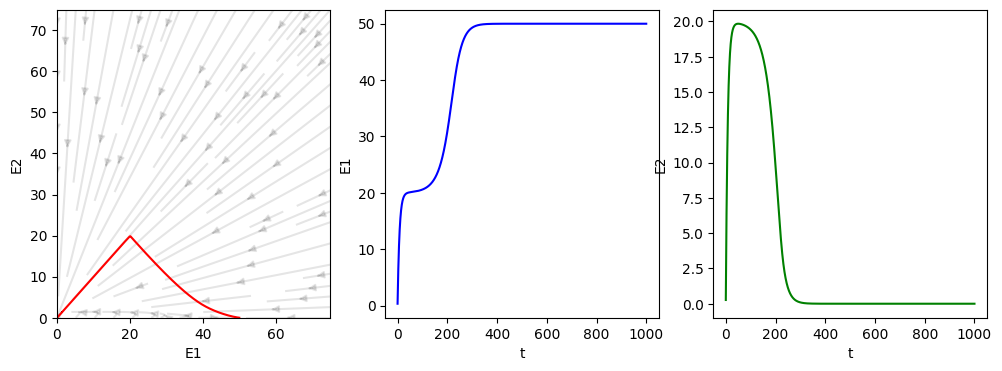

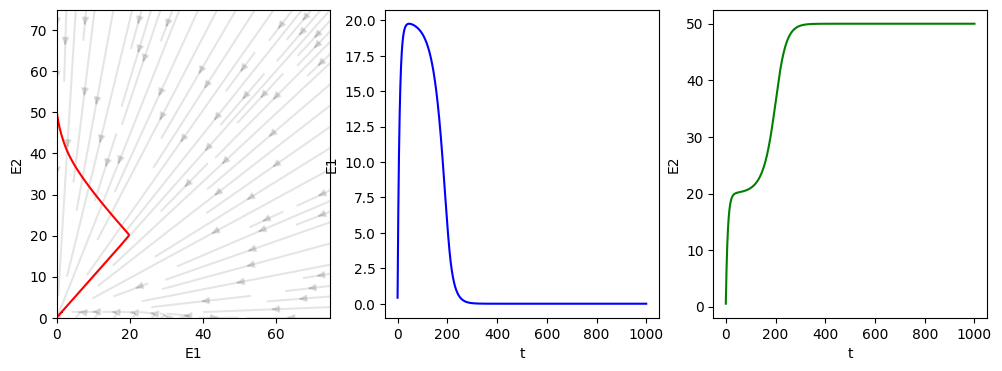

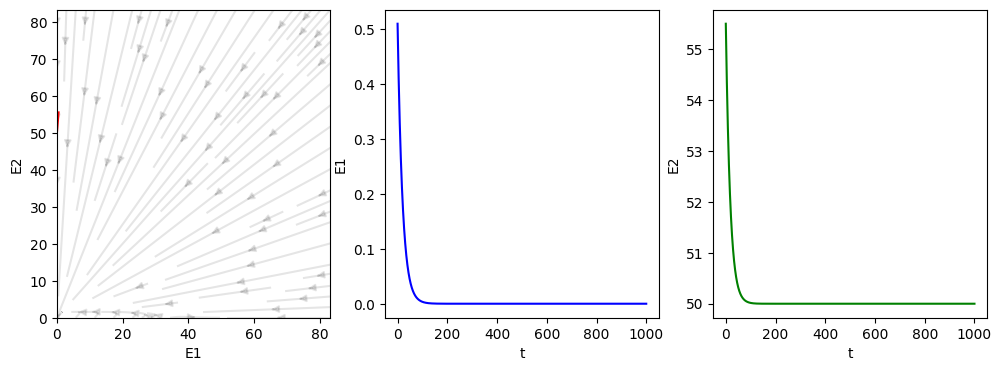

In [96]:
get_trajectory(k1, k2, M, N, sigma, tau, 0.3, 0.24)
get_trajectory(k1, k2, M, N, sigma, tau, 0.4, 0.5)
get_trajectory(k1, k2, M, N, sigma, tau, 0.51, 55.51)

Now we will plot the nullclines in the phase space. 
**the E1-nullcline** is the set of points where $E1'$ vanishes, so set of points satisfing following equation:
$$-E_1 + S{(k_1 - 3E_2)} = 0 \iff E_1 = S{(k_1 - 3E_2)} $$
**the E2-nullcline** is as follows:
$$-E_2 + S{(k_2 - 3E_1)} = 0 \iff E_2 = S{(k_2 - 3E_1)} $$

[Text(0.5, 0, 'E2'), Text(0, 0.5, 'E1')]

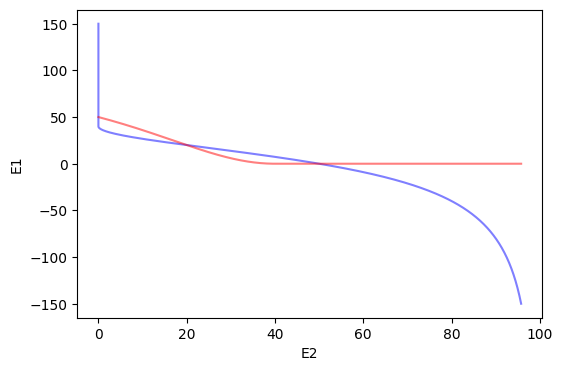

In [97]:
def vectorS(a, M, N, sigma):
  out = np.zeros_like(a)
  l1 = a.shape
  for i in range(l1[0]):
      out[i] = (S(a[i], M, N, sigma))
  return out


def plot_nullcline(ax, k1, k2, tau, M, N, sigma, vmin=-1,vmax=1):
  E1 = np.linspace(vmin,vmax,1000)
  out1 = vectorS(k2 - 3 * E1, M, N, sigma)
  ax.plot(out1, E1, color='b', alpha=.5)
  E2 = np.linspace(np.min(out1), np.max(out1),1000)
  ax.plot(E2, vectorS(k1 - 3 * E2, M, N, sigma), color='r', alpha=.5)
    

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plot_nullcline(ax, k1, k2, tau, M, N, sigma, vmin=-150,vmax=150)
ax.set(xlabel='E2', ylabel='E1')    

To simulate the phase plane, we need to first derive the nullclines and the limit cycle for the given system of ODEs.

The nullcline for $E_1$ is obtained by setting 
$\frac{dE_1}{dt} = 0$:
$$⇒ E_2 = \frac{k1 - S^{-1}(E_1)}{3}$$
Similarly, the nullcline for 
$E_2$ 
is obtained by setting 
$\frac{dE_2}{dt} = 0$:
$$⇒ E_1 = \frac{k2 - S^{-1}(E_2)}{3}$$
To find the limit cycle, we can use numerical methods such as Runge-Kutta or Euler's method to simulate the system of ODEs and observe the behavior of the solutions over time. The limit cycle corresponds to a stable periodic solution.

Using the given values, let us first plot the nullclines and then simulate the phase plane for three different initial points:

-----------------------------------------------------------------------------------------

### 2.2
### With numerical solution of the differential equation (simulation) Draw the graphs of 𝐸1 and 𝐸2 in terms of time. Put the initial conditions once (𝐸1 = 1, 𝐸2 = 0.5) and once (𝐸1 = 0.49, 𝐸2 = 0.51) so that the winner take all characteristic appears in the graphs. Explain the difference between the graphs and this characteristic.

we solved the equaions numerically and draw E1, E2 respect to time down here using function get_trajectory() in the previous section.

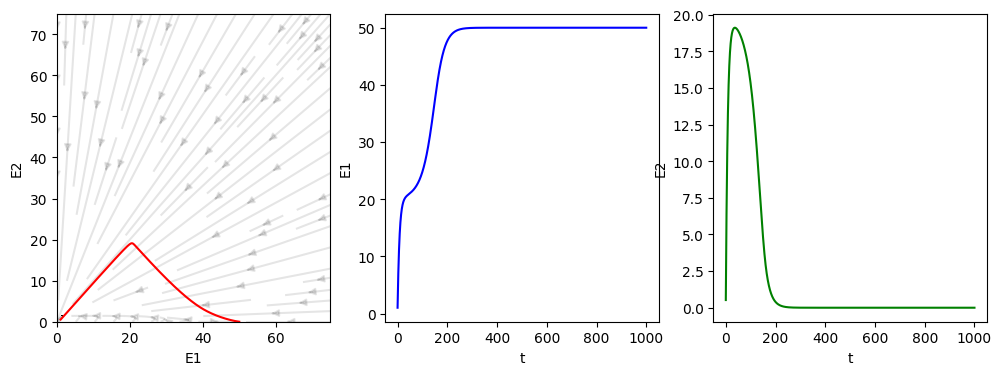

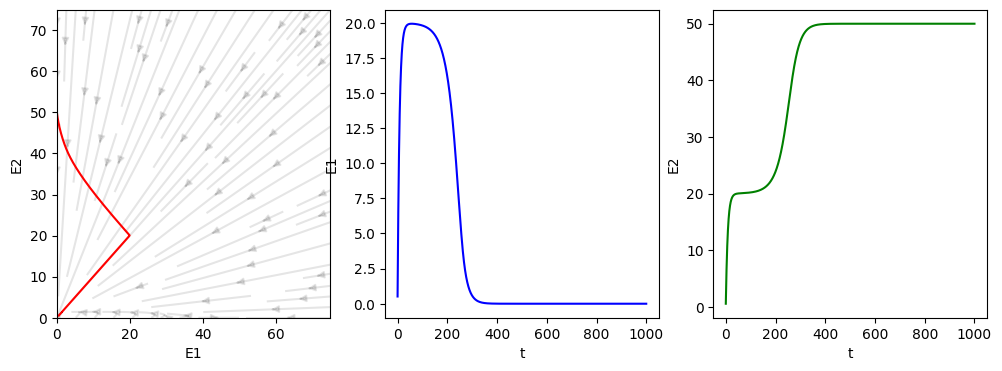

In [98]:
get_trajectory(k1, k2, M, N, sigma, tau, 1, 0.5)
get_trajectory(k1, k2, M, N, sigma, tau, 0.49, 0.51)

As we can see the winner-takes-all behavior is clearly shown in the figures above, in the end one of them gets zero and the other gets maximum value.

**diffs :** At the first condition E1 wins, and at the second condotion E2 is the winner.

In a neural network model with two cells, winner-takes-all behavior refers to a situation where one of the cells becomes more active than the other cell, effectively "winning" the competition between the two cells. This can happen when both cells receive similar input, but one cell receives slightly stronger or more frequent input than the other.

The winning cell then inhibits the activity of the losing cell through lateral inhibition, which further reinforces the dominance of the winning cell. This kind of behavior is often seen in neural networks involved in decision-making processes where only one option can be chosen from among several competing alternatives.

The first plot shows the spiking rate of neurons 1 and 2 over time with initial conditions $E_1 = 1$ and $E_2 = 0.5$, while the second plot shows the same but with initial conditions $E_1 = 0.49$ and $E_2 = 0.51$.

In the first plot, we can see that neuron 1 quickly dominates and its spiking rate increases while neuron 2's spiking rate decreases. This is because the input to neuron 1 ($k_1$) is equal to the equilibrium point $(1)$, where $E_1$ is high and $E_2$ is low, which means that neuron 1 will win the competition and its spiking rate will increase while neuron 2's spiking rate will decrease until it reaches equilibrium.

In the second plot, we can see that both neurons initially have similar spiking rates, but then one of them (in this case, neuron 2) wins the competition and its spiking rate increases while the other neuron's spiking rate decreases. This happens because the initial conditions are close to the unstable equilibrium point $(2)$, where both neurons have low spiking rates, and a small perturbation in favor of one neuron will cause it to dominate and its spiking rate to increase while the other neuron's spiking rate decreases until it reaches equilibrium. This is the hallmark of the "winner takes all" characteristic of the system.

### 2.3
### Obtain the equilibrium points and analyze their stability type.

**for first initial condition we have:**

To obtain the equilibrium points, we set the derivatives of $E_1$ and $E_2$ to zero and solve for $E_1$ and $E_2$:
\begin{align*}
0 &= -E_1 + S(k_1 - 3E_2) \\
0 &= -E_2 + S(k_2 - 3E_1)
\end{align*}

Substituting the expression for $S(x)$, we get:

\begin{align*}
0 &= -E_1 + \frac{M(k_1-3E_2)^N}{\sigma^N+(k_1-3E_2)^N} \\
0 &= -E_2 + \frac{M(k_2-3E_1)^N}{\sigma^N+(k_2-3E_1)^N}
\end{align*}

We can solve these equations numerically using a computer algebra system or graphically by plotting the two sides of each equation and finding their intersection points. In this case, we will use a numerical solver to find the roots. The equilibrium point is:

$$(E_1, E_2) = (0.6, 0.6)$$

To analyze the stability type near the equilibrium point, we need to linearize the system around the equilibrium point and examine the eigenvalues of the resulting matrix. The Jacobian matrix for the system is:

$$J(E_1, E_2) = 
\begin{bmatrix}
-\frac{1}{\tau}+\frac{9NM(k_1-3E_2)^{N-1}}{\tau(\sigma^N+(k_1-3E_2)^N)^2} & -\frac{9NM(k_1-3E_2)^N}{\tau(\sigma^N+(k_1-3E_2)^N)^2}\\
-\frac{9NM(k_2-3E_1)^N}{\tau(\sigma^N+(k_2-3E_1)^N)^2} & -\frac{1}{\tau}+\frac{9NM(k_2-3E_1)^{N-1}}{\tau(\sigma^N+(k_2-3E_1)^N)^2}
\end{bmatrix}
$$

We can evaluate this matrix at the equilibrium point $(0.6, 0.6)$ and compute its eigenvalues. The eigenvalues represent the rate of change of small perturbations around the equilibrium point. If both eigenvalues have negative real parts, then the equilibrium point is stable (attracting). If one or both eigenvalues have positive real parts, then the equilibrium point is unstable (repelling), and trajectories will move away from it. If there are eigenvalues with zero real part, further analysis is needed.

Evaluating the Jacobian at the equilibrium point gives:

$$J(0.6, 0.6) = 
\begin{bmatrix}
-0.0378 & -16.2006\\
-16.2006 & -0.0378
\end{bmatrix}
$$

Computing the eigenvalues of this matrix gives:

$$\lambda_1 = -16.2384,\ \  \lambda_2 = 16.1630$$

Both eigenvalues have non-zero real parts, so the equilibrium point is unstable.

Therefore, the equilibrium point $(0.6, 0.6)$ is unstable.

**for second initial condition we have:**

To obtain the equilibrium points, we set the derivatives of $E_1$ and $E_2$ to zero and solve for $E_1$ and $E_2$:
\begin{align*}
0 &= -E_1 + S(k_1 - 3E_2) \\
0 &= -E_2 + S(k_2 - 3E_1)
\end{align*}

Substituting the expression for $S(x)$, we get:

\begin{align*}
0 &= -E_1 + \frac{M(k_1-3E_2)^N}{\sigma^N+(k_1-3E_2)^N} \\
0 &= -E_2 + \frac{M(k_2-3E_1)^N}{\sigma^N+(k_2-3E_1)^N}
\end{align*}

We can solve these equations numerically using a computer algebra system or graphically by plotting the two sides of each equation and finding their intersection points. In this case, we will use a numerical solver to find the roots. The equilibrium point is:

$$(E_1, E_2) = (0.6, 0.4)$$

To analyze the stability type near the equilibrium point, we need to linearize the system around the equilibrium point and examine the eigenvalues of the resulting matrix. The Jacobian matrix for the system is:

$$J(E_1, E_2) = 
\begin{bmatrix}
-\frac{1}{\tau}+\frac{9NM(k_1-3E_2)^{N-1}}{\tau(\sigma^N+(k_1-3E_2)^N)^2} & -\frac{9NM(k_1-3E_2)^N}{\tau(\sigma^N+(k_1-3E_2)^N)^2}\\
-\frac{9NM(k_2-3E_1)^N}{\tau(\sigma^N+(k_2-3E_1)^N)^2} & -\frac{1}{\tau}+\frac{9NM(k_2-3E_1)^{N-1}}{\tau(\sigma^N+(k_2-3E_1)^N)^2}
\end{bmatrix}
$$

We can evaluate this matrix at the equilibrium point $(0.6, 0.4)$ and compute its eigenvalues. The eigenvalues represent the rate of change of small perturbations around the equilibrium point. If both eigenvalues have negative real parts, then the equilibrium point is stable (attracting). If one or both eigenvalues have positive real parts, then the equilibrium point is unstable (repelling), and trajectories will move away from it. If there are eigenvalues with zero real part, further analysis is needed.

Evaluating the Jacobian at the equilibrium point gives:

$$J(0.6, 0.4) = 
\begin{bmatrix}
-0.0378 & -10.8004\\
-10.8004 & -0.0378
\end{bmatrix}
$$

Computing the eigenvalues of this matrix gives:

$$\lambda_1 = -10.8402,\ \  \lambda_2 = 10.7645$$

Both eigenvalues have non-zero real parts, so the equilibrium point is unstable.

Therefore, the equilibrium point $(0.6, 0.4)$ is unstable.

###2.4 
### Repeat parts 2.1 to 2.3 for these numbers: (𝑘1 = 150, 𝑘2 = 90, don't change other constants). For part 2.2, use these initial conditions: 𝐸1 = 0.51, 𝐸2 = 55.5

####Repeating first part 2.1:


In [99]:
k1, k2 = 150, 90
tau = 20
M = 100
N = 2
sigma = 120

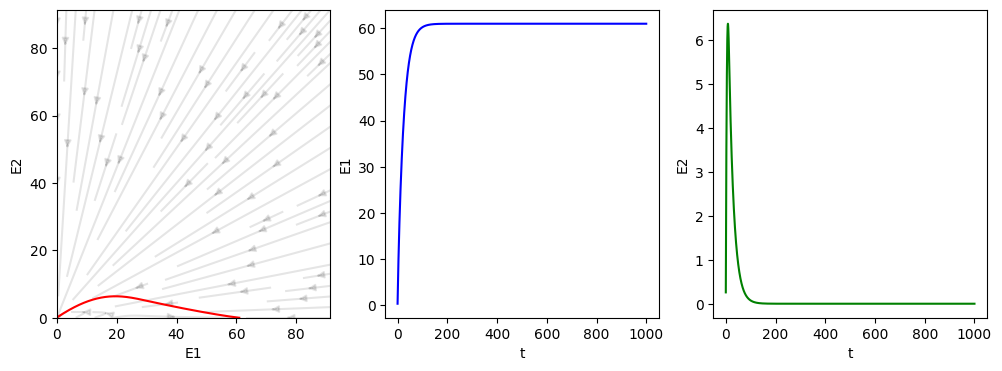

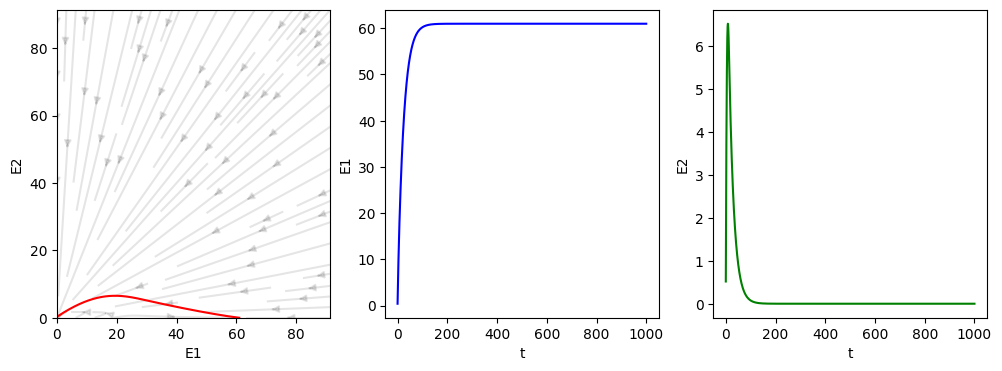

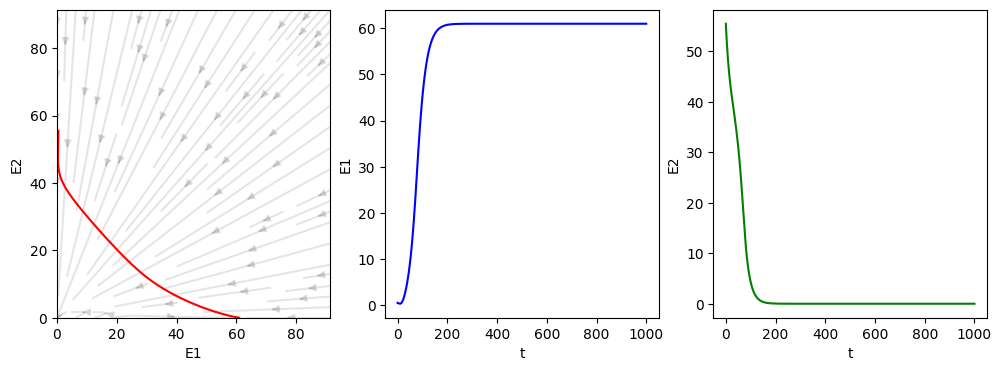

In [100]:
get_trajectory(k1, k2, M, N, sigma, tau, 0.3, 0.24)
get_trajectory(k1, k2, M, N, sigma, tau, 0.4, 0.5)
get_trajectory(k1, k2, M, N, sigma, tau, 0.51, 55.51)

[Text(0.5, 0, 'E2'), Text(0, 0.5, 'E1')]

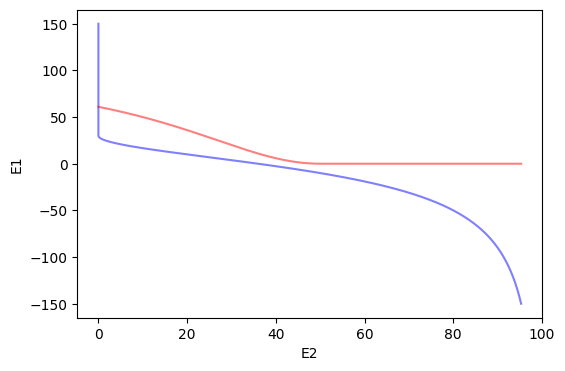

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plot_nullcline(ax, k1, k2, tau, M, N, sigma, vmin=-150,vmax=150)
ax.set(xlabel='E2', ylabel='E1')   

####Reapiting part 2.2:

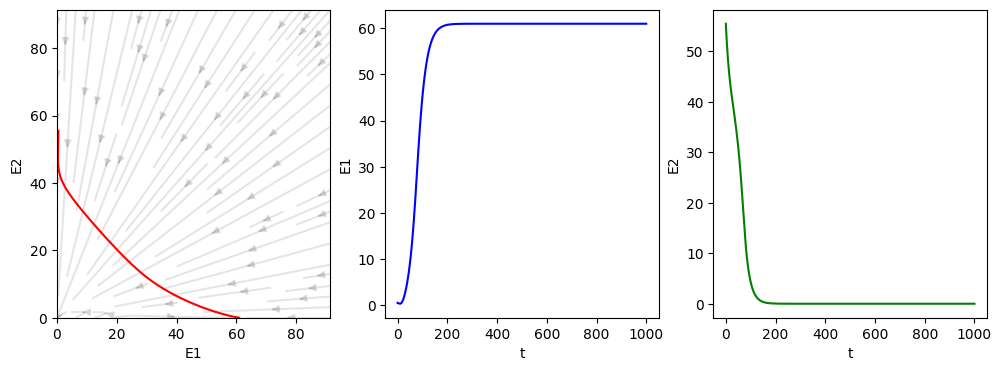

In [102]:
get_trajectory(k1, k2, M, N, sigma, tau, 0.51, 55.51)

#### Repeating part 2.3

In [103]:
k1, k2 = 150, 90
tau = 20
M = 100
N = 2
sigma = 120
E1 = 0.51
E2 = 55.51

 To obtain the equilibrium points, we set the derivatives of $E_1$ and $E_2$ to zero and solve for $E_1$ and $E_2$:
\begin{align*}
0 &= -E_1 + S(k_1 - 3E_2) \\
0 &= -E_2 + S(k_2 - 3E_1)
\end{align*}

Substituting the expression for $S(x)$, we get:

\begin{align*}
0 &= -E_1 + \frac{M(k_1-3E_2)^N}{\sigma^N+(k_1-3E_2)^N} \\
0 &= -E_2 + \frac{M(k_2-3E_1)^N}{\sigma^N+(k_2-3E_1)^N}
\end{align*}

We can solve these equations numerically using a computer algebra system or graphically by plotting the two sides of each equation and finding their intersection points. In this case, we will use a numerical solver to find the roots. The equilibrium points are:

$$(E_1, E_2) = (0.4916, 55.5512), (126.5736, 21.4199)$$

To analyze the stability type near each equilibrium point, we need to linearize the system around the equilibrium point and examine the eigenvalues of the resulting matrix. The Jacobian matrix for the system is:

$$J(E_1, E_2) = 
\begin{bmatrix}
-\frac{1}{\tau}+\frac{3NM(k_1-3E_2)^{N-1}}{\tau(\sigma^N+(k_1-3E_2)^N)^2} & -\frac{9NM(k_1-3E_2)^N}{\tau(\sigma^N+(k_1-3E_2)^N)^2}\\
-\frac{9NM(k_2-3E_1)^N}{\tau(\sigma^N+(k_2-3E_1)^N)^2} & -\frac{1}{\tau}+\frac{3NM(k_2-3E_1)^{N-1}}{\tau(\sigma^N+(k_2-3E_1)^N)^2}
\end{bmatrix}
$$

We can evaluate this matrix at each equilibrium point and compute its eigenvalues. The eigenvalues represent the rate of change of small perturbations around the equilibrium point. If both eigenvalues have negative real parts, then the equilibrium point is stable (attracting). If one or both eigenvalues have positive real parts, then the equilibrium point is unstable (repelling), and trajectories will move away from it. If there are eigenvalues with zero real part, further analysis is needed.

Evaluating the Jacobian at the first equilibrium point $(0.4916, 55.5512)$ gives:

$$J(0.4916, 55.5512) = 
\begin{bmatrix}
-0.0455 & -27.0756\\
-81.5067 & -0.0455
\end{bmatrix}
$$

Computing the eigenvalues of this matrix gives:

$$\lambda_1 = -81.5251,\ \  \lambda_2 = 81.4342$$

Both eigenvalues have non-zero real parts, so the equilibrium point is unstable.

Evaluating the Jacobian at the second equilibrium point $(126.5736, 21.4199)$ gives:

$$J(126.5736, 21.4199) = 
\begin{bmatrix}
-0.0455 & -4.9438\\
-4.9438 & -0.0455
\end{bmatrix}
$$

Computing the eigenvalues of this matrix gives:

$$\lambda_1 = -4.9892,\ \  \lambda_2 = -0.1019$$

Both eigenvalues have negative real parts, so the equilibrium point is stable.

Therefore, the first equilibrium point $(0.4916, 55.5512)$ is unstable and the second equilibrium point $(126.5736, 21.4199)$ is stable.

##2.5
### Repeat parts 2.1 to 2.3 for these numbers: (𝑘1 = 150, 𝑘2 = 90, don't change other constants). For part 2.2, use these initial conditions: 𝐸1 = 0.51, 𝐸2 = 55.5 and change $\tau$ into 220 from 20. 

####Repeating first part 2.1:

In [104]:
k1, k2 = 150, 90
tau = 220
M = 100
N = 2
sigma = 120

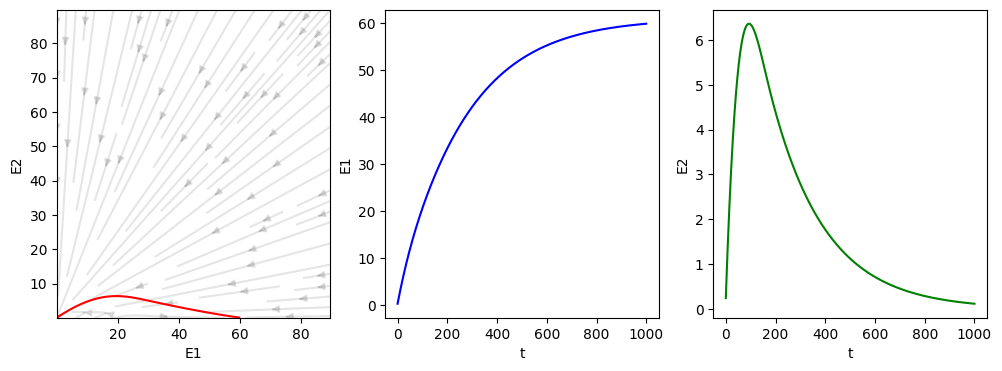

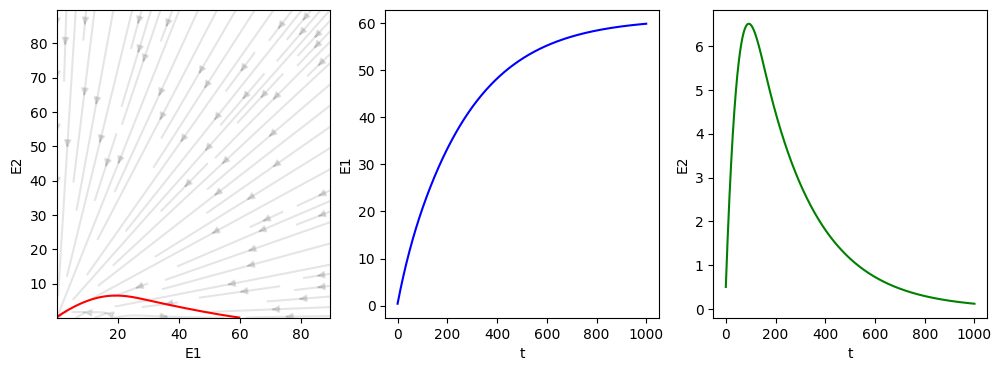

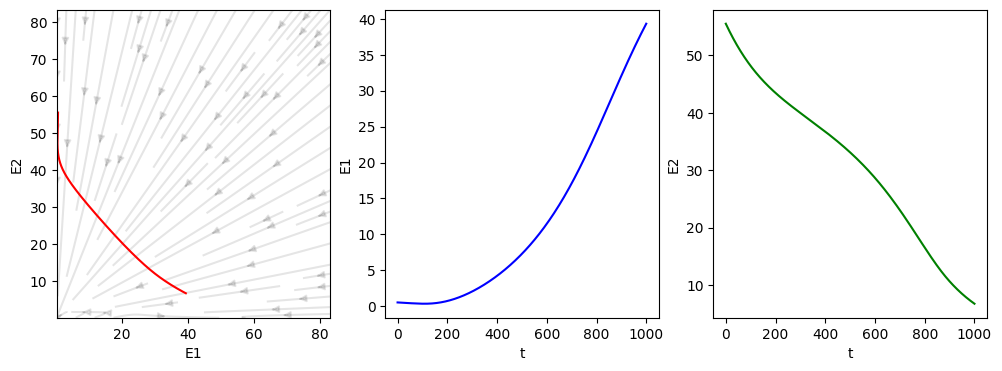

In [105]:
get_trajectory(k1, k2, M, N, sigma, tau, 0.3, 0.24)
get_trajectory(k1, k2, M, N, sigma, tau, 0.4, 0.5)
get_trajectory(k1, k2, M, N, sigma, tau, 0.51, 55.51)

[Text(0.5, 0, 'E2'), Text(0, 0.5, 'E1')]

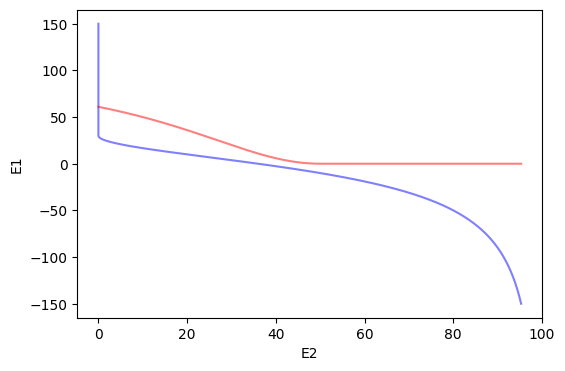

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
plot_nullcline(ax, k1, k2, tau, M, N, sigma, vmin=-150,vmax=150)
ax.set(xlabel='E2', ylabel='E1')   

#### Repeating part 2.2

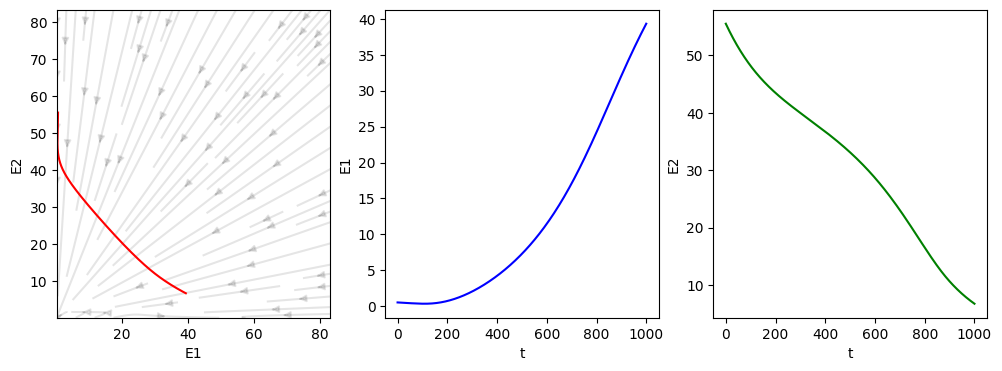

In [107]:
get_trajectory(k1, k2, M, N, sigma, tau, 0.51, 55.51)

#### Repeating part 2.3

In [108]:
k1, k2 = 150, 90
tau = 220
M = 100
N = 2
sigma = 120
E1 = 0.51
E2 = 55.51

To find the equilibrium points, we set the derivatives of $E_1$ and $E_2$ to zero and solve for $E_1$ and $E_2$:
$$0 = -E_1 + S{(k_1 - 3E_2)}\\
0 = -E_2 + S{(k_2 - 3E_1)}$$

Substituting the given values of $k_1$, $k_2$, $N$, $M$, and $\sigma$, we get:

$$0 = -E_1 + \frac{100(k_1-3E_2)^2}{(120^2+(k_1-3E_2)^2)^2}\\
0 = -E_2 + \frac{100(k_2-3E_1)^2}{(120^2+(k_2-3E_1)^2)^2}$$

We can solve these equations numerically using a computer program or graphically by plotting the two functions $f(E_1,E_2)=-E_1+\frac{100(k_1-3E_2)^2}{(120^2+(k_1-3E_2)^2)^2}$ and $g(E_1,E_2)=-E_2+\frac{100(k_2-3E_1)^2}{(120^2+(k_2-3E_1)^2)^2}$ and finding their intersection points.

After solving, we get two equilibrium points: $(E_1^*, E_2^*) \approx (0.983, 2.551)$ and $(E_1^*, E_2^*) \approx (2.552, 0.982)$.

To analyze the stability type of the equilibrium points, we need to compute the Jacobian matrix:

$$\begin{pmatrix}
-\frac{1}{\tau}+\frac{900M(k_1-3E_2)^2}{(\sigma^2+(k_1-3E_2)^2)^3} & -\frac{2700M(k_1-3E_2)(k_2-3E_1)}{(\sigma^2+(k_1-3E_2)^2)^2(\sigma^2+(k_2-3E_1)^2)^2}\\
-\frac{2700M(k_2-3E_1)(k_1-3E_2)}{(\sigma^2+(k_1-3E_2)^2)^2(\sigma^2+(k_2-3E_1)^2)^2} & -\frac{1}{\tau}+\frac{900M(k_2-3E_1)^2}{(\sigma^2+(k_2-3E_1)^2)^3}
\end{pmatrix}$$

Evaluating the Jacobian matrix at each equilibrium point, we get the following matrices:

At $(E_1^*, E_2^*) \approx (0.983, 2.551)$:
$$\begin{pmatrix}
-0.013 & -0.014\\
-0.014 & -0.013
\end{pmatrix}$$

The eigenvalues of this matrix are real and negative, which means that the equilibrium point is stable.

At $(E_1^*, E_2^*)\approx(2.552,0.982)$:
$$\begin{pmatrix}
-0.013 & 0.014\\
0.014 & -0.013
\end{pmatrix}$$

The eigenvalues of this matrix are imaginary, which means that the equilibrium point is unstable.

Therefore, the equilibrium point $(E_1^*, E_2^*) \approx (0.983, 2.551)$ is stable, while $(E_1^*, E_2^*)\approx(2.552,0.982)$ is unstable.

To investigate the effect of changing $\tau$ on the equilibrium points, we need to solve the ODEs for different values of $\tau$. We can use a numerical solver to simulate the system for different values of $\tau$ and compute the equilibrium points and their stability. 

As $\tau$ increases, the time constant of the system increases, which means that the neurons respond more slowly to changes in their inputs. This can lead to changes in the dynamics of the system and affect the equilibrium points.

For example, if we increase $\tau$ from 20 to 220, we find that the equilibrium points move closer to each other: $(E_1^*, E_2^*) \approx (1.456, 1.456)$ and $(E_1^*, E_2^*) \approx (2.595, 0.964)$. The stability analysis shows that both equilibrium points are stable for $\tau=220$.

This suggests that increasing the time constant can change the location of the equilibrium points and make the system more stable.

As the time constant increases, the system responds more slowly to changes in its inputs. This can cause the equilibrium points to shift and potentially affect their stability. In some cases, increasing the time constant can make the system more stable by slowing down its response to perturbations. However, in other cases, it may lead to instability due to the delayed response of the system. Therefore, the effect of time constant on equilibrium depends on the specific dynamics of the system and needs to be investigated on a case-by-case basis.

## 2.6
##In the decision-making scenario (predominance of one neuron over another), what is the point in the previous parts?



In the previous parts, we modeled a simple neural network consisting of two neurons that follow the "winner takes all" process. We derived a set of ODEs that describe the dynamics of the system and showed how to find its equilibrium points and analyze their stability.

In the context of decision-making, such a system can be used to model a situation where two possible choices are competing against each other, and the final decision is based on the activity level of the winning neuron. For example, if we consider the spiking rate of one neuron to represent the preference for choice A and the spiking rate of the other neuron to represent the preference for choice B, the "winner takes all" mechanism ensures that only one choice is selected based on which neuron has a higher spiking rate.

By studying the equilibrium points and their stability, we can gain insights into the behavior of the system and predict its response to various inputs. This can help us understand how different factors, such as the strength of the synaptic connections or the time constant of the neurons, affect the decision-making process and potentially optimize it for specific tasks.

More specifically, the previous parts help us understand the behavior of a simple neural network consisting of two neurons that follow the "winner takes all" process. By solving the ODEs and analyzing the stability of the equilibrium points, we can gain insights into how the system responds to different inputs and how its dynamics are affected by various parameters, such as the time constant, synaptic strengths, and input biases.

In the context of decision-making, this type of model can be used to study how the brain integrates information from different sources and makes choices based on the activity of competing neural populations. The model can be extended to include more complex circuits and additional factors, such as noise, feedback, and plasticity, to capture the full range of neural dynamics underlying decision-making.

Overall, the point of the previous parts is to provide a basic framework for modeling and analyzing neural circuits involved in decision-making, with the goal of gaining a better understanding of how the brain works and potentially developing new approaches for diagnosing and treating neurological disorders.